In [1]:
from src.experiment import Experiment

In [2]:
a = Experiment()

In [3]:
a.layout.widget

Datasets: 0it [00:00, ?it/s]

L = 991.346, delta = 0.006, mu = 2.000



States number:   0%|                                                                                                                                                 | 0/1 [00:00<?, ?it/s]

Nodes number:   0%|                                                                                                                                                  | 0/1 [00:00<?, ?it/s]/home/michael/Documents/DistributedOpt/Experiments/decentralized/src/network/network.py:134: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G, nodelist=self.nodelist).toarray()


1.8396888471092173e-08
[[0.33333333 0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.33333333]
 [0.33333333 0.33333333 0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         

1.8396888471092173e-08
[[0.33333333 0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.33333333]
 [0.33333333 0.33333333 0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         

1.8396888471092173e-08
[[0.33333333 0.33333333 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.33333333]
 [0.33333333 0.33333333 0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
/home/michael/Documents/DistributedOpt/Experiments/decentralized/src/method/constraints.py:57: RuntimeWarning: invalid value encountered in multiply
  z_list.x[i] = z_list.x[i] / x_norm * self.r_x
/home/michael/Documents/DistributedOpt/Experiments/decentralized/src/method/constraints.py:65: RuntimeWarning: invalid value encountered in multiply
  z_list.y[i] = z_list.y[i] / y_norm * self.r_y
/home/michael/Documents/DistributedOpt/Experiments/decentralized/src/oracles/robust_linear.py:68: RuntimeWarning: overflow encountered in multiply
  return (self.matvec_ATx(w) + self._ones.dot(w) * delta) / den + self.regcoef_x * x
/home/michael/Documents/DistributedOpt/Experiments/decentralized/src/oracles/robust_linear.py:74: RuntimeWarning: overflow encountered in multiply
  self._n / den * delta.dot(x) * x
/home/michael/Documents/Distr

In [ ]:
a.layout.value["Runner"]["General:"]

In [7]:
from typing import List, Optional
from src.oracles.base import ArrayPair
import matplotlib.pyplot as plt
import itertools
import numpy as np
import os
import pickle

In [8]:
def plot_algorithms(
    topology: str,
    states_number: int,
    nodes_number: int,
    data: str,
    labels: List[str],
    method_names: List[str],
    comm_budget_experiment: int,
    dist_types: Optional[List[str]] = ["argument", "gradient", "consensus"],
    logs_path: Optional[str] = "./logs",
    experiment_name: Optional[str] = "John Doe",
    experiment_type: Optional[str] = "synthetic",
    plots_path: Optional[str] = "./plots",
    save_folder: Optional[str] = None,
    save_to: Optional[str] = None,
):
    def saddle_grad_norm(a: ArrayPair, b: ArrayPair, **kwargs):
        x, y = (a - b).tuple()
        return LA.norm(x.sum(axis=0) / x.shape[0]) ** 2 + LA.norm(y.sum(axis=0) / y.shape[0]) ** 2

    for type_ in dist_types:
        plt.figure(figsize=(12, 6))
        plt.title(f"{topology} graph, {nodes_number} nodes, {data}", fontsize=25)
        marker = itertools.cycle(("o", "v", "^", "<", ">", "s", "8", "p"))

        ax = plt.gca()
        min_comm = np.inf
        flag = True
        if type_ == "argument":
            plt.ylabel("$||\overline{z} - z^*||^2$", fontsize=22)
        elif type_ == "gradient":
            plt.ylabel("$||\dfrac{1}{M} \sum_{m=1}^{M} F_m(z_m)||^2$", fontsize=22)
        elif type_ == "consensus":
            plt.ylabel("dist. to consensus", fontsize=22)
            flag = False
        else:
            raise ValueError(f"Unknown distance to optimum type: {type_}!")
        for method_name, label in zip(method_names, labels):
            path = os.path.join(logs_path,experiment_name, experiment_type, str(states_number), str(nodes_number))
            #os.system(f"mkdir -p {os.path.join(path, type_)}")
            #with open(os.path.join(path, type_, f"logger_{method_name}.pkl"), "rb") as f:
            with open(os.path.join(path, f"logger_{method_name}"), "rb") as f:
                dist = pickle.load(f)
#             with open(os.path.join(path, "z_true"), "rb") as f:
#                 z_true = pickle.load(f)
#                 z_0 = ArrayPair.zeros(z_true.x.shape[0])
            #comm_steps = np.arange(len(dist)) * (comm_budget_experiment / len(dist))
            color = next(ax._get_lines.prop_cycler)["color"]
#             if flag:
#                 i = np.where(dist == np.amin(dist))[0][0]
#                 if dist[i] < min_comm:
#                     min_comm = comm_steps[i]

#                 if type_ == "argument":
#                     dist /= (z_0 - z_true).dot(z_0 - z_true)
#                 elif type_ == "gradient":
#                     dist /= saddle_grad_norm(z_0, z_true)
            comm_steps = list(range(len(dist[type_])))
            print(dist[type_])
            if not np.isnan(dist[type_]).any():
                plt.plot(
                    comm_steps,
                    dist[type_] / np.max(dist[type_]),
                    label=label,
                    marker=next(marker),
                    color=color,
                    markevery=0.15,
                    markersize=6,
                )

        plt.xlabel("communications", fontsize=22)
#         if flag:
#             plt.xlim((0, min_comm))
        plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
        plt.tick_params(labelsize=15)
        plt.yscale("log")
        plt.legend(fontsize=16, loc="lower left")
        plt.grid()
        plt.tight_layout(rect=[0, 0, 1, 0.93])

        if save_to is not None:
            if save_folder is not None:
                path = os.path.join(plots_path, experiment_type, type_, topology, save_folder)
            else:
                path = os.path.join(plots_path, experiment_type, type_, topology)
            os.system(f"mkdir -p {path}")
            plt.savefig(os.path.join(path, f"{save_to}.pdf"))
            plt.close()
        else:
            plt.show()

[0.021326579992021453, 0.020217032974159697, 0.019192295827536145, 0.01824484634198134, 0.017367946733668302, 0.016555551782446325, 0.015802228788680976, 0.015103087703955277, 0.014453720034357843, 0.013850145321296161, 0.013288764179013804, 0.012766317015415682, 0.012279847687716191, 0.011826671450409783, 0.011404346643121198, 0.011010649642530438, 0.010643552667884302, 0.010301204085359747, 0.009981910904209839, 0.009684123198437465, 0.009406420222746998, 0.009147498021594092, 0.008906158356027075, 0.008681298795311656, 0.008471903839579152, 0.008277036956381621, 0.008095833428450782, 0.007927493922460714, 0.007771278699457276, 0.007626502397070475, 0.007492529321865102, 0.007368769197377415, 0.007254673319673524, 0.007149731077770834, 0.007053466801091628, 0.006965436900357274, 0.006885227272059555, 0.006812450939928577, 0.006746745909711378, 0.006687773216131398, 0.006635215143158464, 0.0065887736007191585, 0.006548168642749964, 0.0065131371130684994, 0.006483431406935146, 0.006458

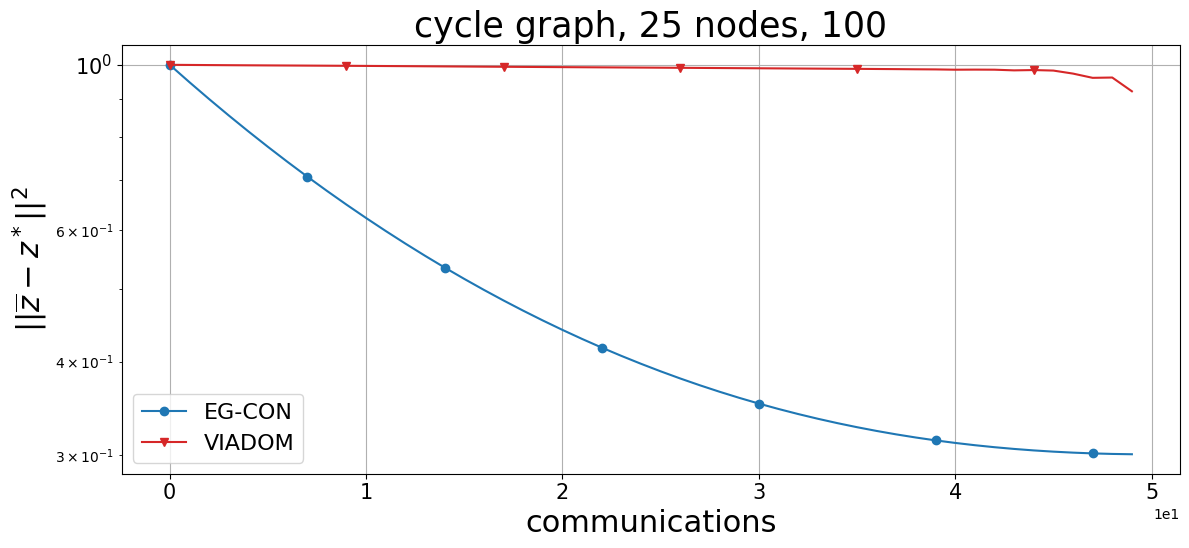

[1786230.3882672677, 1605541.9161821064, 1446264.8350137018, 1305631.0066735835, 1181256.748704841, 1071086.1120079656, 973342.9456118671, 886490.3349792806, 809196.2342493947, 740304.3072002629, 678809.1533476528, 623835.2300938368, 574618.8938350262, 530493.0762629398, 490874.18992564647, 455250.9220699807, 423174.63004609966, 394251.09691482055, 368133.4438529252, 344516.02773864847, 323129.17894640076, 303734.65673934313, 286121.7184294921, 270103.71426659066, 255515.13330919575, 242209.0367321409, 230054.82447356274, 218936.28910523804, 208749.9175583239, 199403.4070499584, 190814.3663993413, 182909.17803264805, 175621.9994697398, 168893.8860586913, 162672.01925762475, 156909.02692515304, 151562.3839279635, 146593.88295468577, 141969.16677956443, 137657.31438162457, 133630.47432365926, 129863.53965471507, 126333.85934029077, 123020.98186350893, 119906.42719278546, 116973.4837894352, 114207.02774282079, 111593.36148006572, 109120.06980967062, 106775.89133014642]
[1786214.9011989217

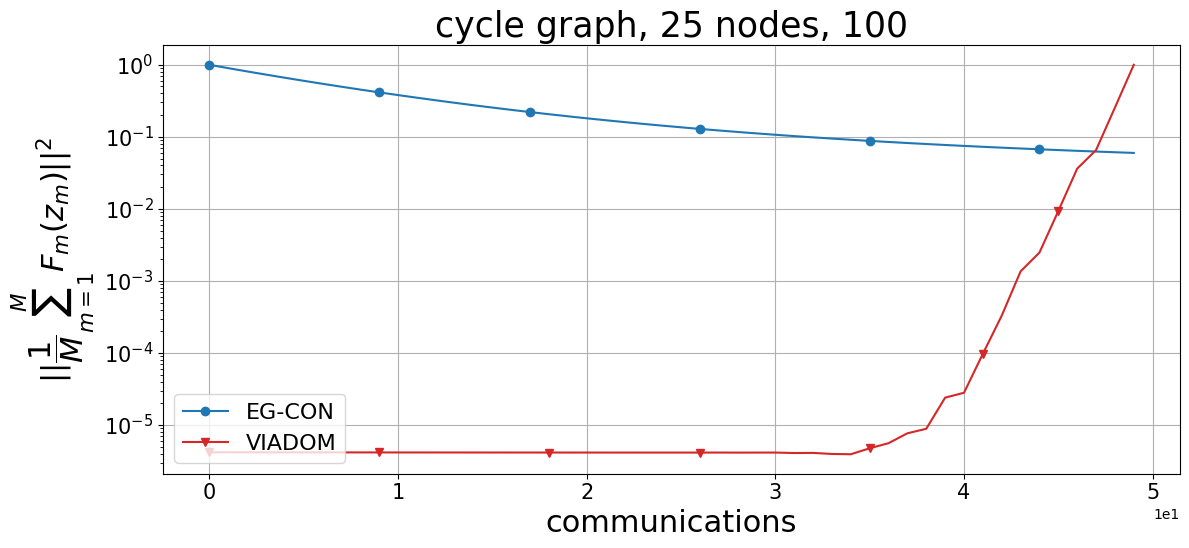

[0.0006311436236064311, 0.0024007973787457805, 0.005142871283455161, 0.00871435863098129, 0.012992034156198151, 0.017869641873836026, 0.02325549760135507, 0.029070442969388627, 0.035246097619326275, 0.041723364600104, 0.04845115096269298, 0.055385271426557574, 0.06248750793740023, 0.06972480210014878, 0.07706856098103132, 0.08449405973282084, 0.09197992699585925, 0.09950770113791339, 0.10706144717994949, 0.11462742576422574, 0.12219380679904218, 0.12975042149742674, 0.13728854744550723, 0.14480072211597983, 0.15228058090449587, 0.15972271633008817, 0.16712255552021701, 0.17447625350948484, 0.18178060022939696, 0.18903293936385798, 0.19623109749912315, 0.2033733222141698, 0.21045822794343638, 0.21748474860325037, 0.2244520961099738, 0.23135972403528424, 0.23820729574490673, 0.2449946564539306, 0.2517218087066202, 0.2583888908531018, 0.2649961581509552, 0.27154396616781623, 0.2780327562026808, 0.2844630424795986, 0.2908354008986511, 0.2971504591561755, 0.30340888806970384, 0.309611393963

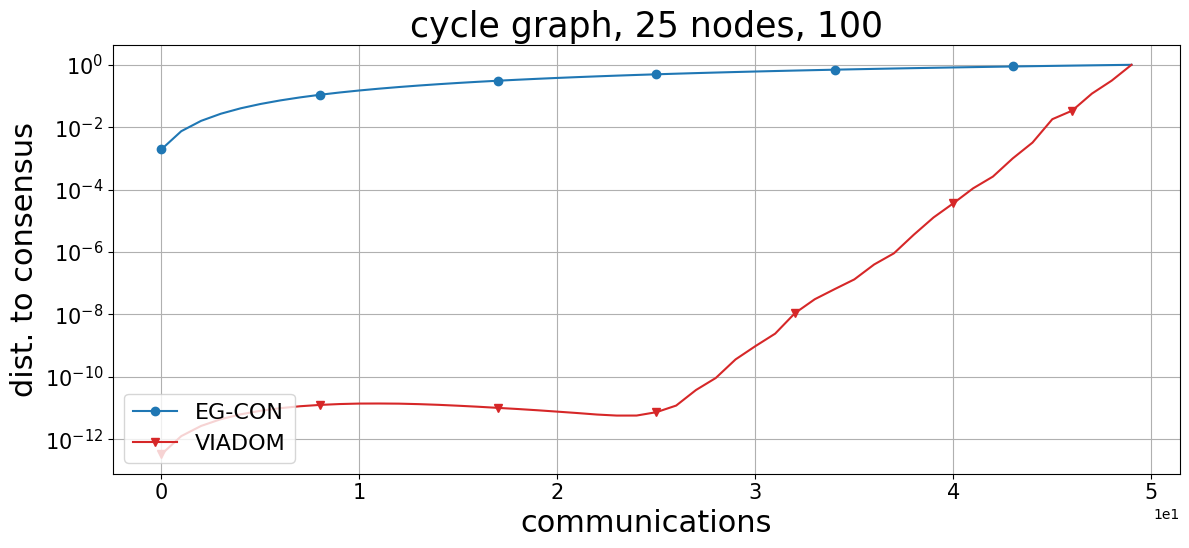

In [9]:
plot_algorithms(
    "cycle",
    50,
    25,
    "100",
    ["EG-CON", "EG-GT", "Sliding", "VIADOM"],
    ["EG-CON", "EG-GT", "Sliding", "VIADOM"],
    500,
)